
 # <span style="color: green;">**Problem malarial cells detection:**</span>
 
 Classification infected or  Uninfected 

In [23]:
# importing required libraries
import os

import pandas as  pd

import numpy as np

import matplotlib.pyplot as plt

import cv2

from PIL import Image 

from sklearn.model_selection import train_test_split

from keras.models import Sequential ,load_model 

from keras.layers import Conv2D,MaxPooling2D,Dense, BatchNormalization, Dropout , Add,Flatten, Activation,MaxPool2D

from keras.optimizers import Adam, rmsprop, adadelta

from sklearn.metrics import roc_curve, auc, confusion_matrix


from keras.utils import to_categorical, normalize



from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
#importing required libraries 

import numpy as np

import cv2

import pandas as pd

from PIL import Image

from keras.models import Sequential

from keras_preprocessing.image import ImageDataGenerator, img_to_array, load_img

from keras.layers import Conv2D,Flatten,MaxPool2D,Dense,add 

import matplotlib.pyplot as plt

from skimage import io

import os

from keras.utils import to_categorical

* path for image data


In [5]:
# Path of parasitezed image folder :

Parasit = 'D:/COMPUTER VISION/Malaria Detection/cell_images/Parasitized/'

uninfect= 'D:/COMPUTER VISION/Malaria Detection/cell_images/Uninfected/'
   

In [6]:
#  list of parasitezed and uninfected image  names

parasit_img  = os.listdir(Parasit)
uninfect_img= os.listdir(uninfect)


In [7]:
parasit_img[1:5]

['C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png']

In [8]:
# Creating empty lsit for Dataset and  label
Dataset=[]
label=[]

* Enumerate :The enumerate() function assigns an index to each item in an iterable object that can be used to reference the item later. 

Loading .......Parasitezed images 

In [9]:
 for i  , img_name in enumerate(parasit_img):
        if (img_name.split('.')[1]=='png'):
            image = cv2.imread(Parasit+img_name)
            
            image = Image.fromarray(image)
            #resize image to 240,240
            img_resiz= image.resize((240,240))
            
            Dataset.append(np.array(img_resiz))
            label.append(0)
            
            


In [10]:
len(parasit_img)+len(uninfect_img)

27560

In [11]:
 for i  , img_name in enumerate(uninfect_img):
        if (img_name.split('.')[1]=='png'):
            image = cv2.imread(uninfect+img_name)
            
            image = Image.fromarray(image)
            #resize image to 240,240
            img_resiz= image.resize((240,240))
            
            Dataset.append(np.array(img_resiz))
            label.append(1)
            


In [9]:
dataset =np.array(Dataset)

In [10]:
dataset.shape

(27558, 240, 240, 3)


 # <span style="color: green;">**Visualizing the Parasitized and Uninfected  images:**</span>

Text(0.5, 1.0, 'Uninfected')

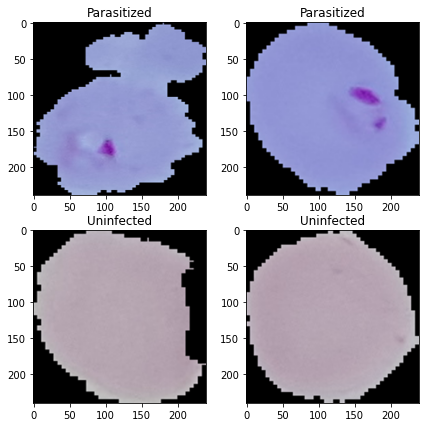

In [11]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(dataset[1])
ax.set_title('Parasitized')

ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(dataset[15])
ax.set_title('Parasitized')



ax = fig.add_subplot(2, 2,3 )
imgplot = plt.imshow(dataset[20000])
ax.set_title('Uninfected')

ax = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(dataset[20001])
ax.set_title('Uninfected')

In [31]:
# Spliting train and test data

 X_train,X_test,y_train,y_test=train_test_split(dataset,pd.(np.array(label)),test_size=0.2,random_state=42)

In [34]:
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (22046, 240, 240, 3)
y_train (22046, 1)
X_test (5512, 240, 240, 3)
y_test (5512, 1)


In [36]:
# We will scale input image 0-1

X_train=normalize(X_train,axis=1)
X_test=normalize(X_test,axis=1)

MemoryError: Unable to allocate 28.4 GiB for an array with shape (22046, 240, 240, 3) and data type float64

,1
2476,0
7808,0
18967,1
26037,1
14316,1
...,...
18113,1
9358,0
3984,0
4265,0


#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(5, 5), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))

#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
# Add Dropout to prevent overfitting


#2nd Fully Connected Layer
AlexNet.add(Dense(4096))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('relu'))
#Add Dropout


#3rd Fully Connected Layer
AlexNet.add(Dense(1))
AlexNet.add(BatchNormalization())
AlexNet.add(Activation('sigmoid'))

AlexNet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])



In [28]:
#Instantiation
AlexNet = Sequential()

#1st Convolutional Layer
AlexNet.add(Conv2D(filters=96, input_shape=(64,64,3),activation='relu', kernel_size=(11,11), strides=(4,4), padding='same'))

AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#2nd Convolutional Layer
AlexNet.add(Conv2D(filters=256,kernel_size=(5,5),activation='relu',strides=(1,1), padding='same'))
AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#3rd Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3), activation='relu',strides=(1,1), padding='same'))

#4th Convolutional Layer
AlexNet.add(Conv2D(filters=384, kernel_size=(3,3),activation='relu', strides=(1,1), padding='same'))


#5th Convolutional Layer
AlexNet.add(Conv2D(filters=256, kernel_size=(3,3),activation='relu', strides=(1,1), padding='same'))

AlexNet.add(MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'))

#Passing it to a Fully Connected layer
AlexNet.add(Flatten())
# 1st Fully Connected Layer
AlexNet.add(Dense(units=4096,activation='relu'))

# Add Dropout to prevent overfitting

#2nd Fully Connected Layer
AlexNet.add(Dense(units=4096,activation='relu'))


#3rd Fully Connected Layer
AlexNet.add(Dense(units=1,activation='sigmoid'))


  

#AlexNet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['Accuracy'])

AlexNet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [29]:
AlexNet.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 60, 60, 96)        34944     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 30, 30, 256)       614656    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 15, 15, 384)       885120    
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 384)       1327488   
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 256)      

In [24]:
# Adding  callback checkpoints and Tensorboard 

from keras.callbacks import ModelCheckpoint, EarlyStopping,CSVLogger,TensorBoard

In [ ]:
aKBASOIKFHIKQSFHNKF

In [24]:
train_datagen = ImageDataGenerator(rescale = 1./255,
shear_range = 0.2,
zoom_range = 0.2,
horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('D:/COMPUTER VISION/Malaria Detection/cell_images',
target_size = (64, 64),
batch_size = 200,
class_mode = 'binary')

test_set = test_datagen.flow_from_directory('D:/COMPUTER VISION/Malaria Detection/Test',
target_size = (64, 64),
batch_size = 4,
class_mode = 'binary')


Found 27558 images belonging to 2 classes.
Found 134 images belonging to 2 classes.


In [41]:
FIlepath='D:/COMPUTER VISION/Malaria Detection/weights-improved.hdf5'

Checkpoint = ModelCheckpoint(FIlepath,monitor='val_accuracy',verbose=1,mode='max',save_best_only=True)

CSVlog = CSVLogger('AlexNetBasic_logs.csv', separator=',',append=False)

file_name='AlexNetTensorlogs'

tensorboard= TensorBoard(log_dir="logs\\{}".format(file_name))

checkpoint_list= [Checkpoint, tensorboard, CSVlog]

In [ ]:
KDGSDGUGSDISD

In [29]:
AlexNet.fit_generator(training_set,
steps_per_epoch = 140,
epochs = 5,
validation_data = test_set,
validation_steps = 2000)

Epoch 1/5


UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_6/convolution}}]]
	 [[metrics_1/acc/Mean_1/_311]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv2d_6/convolution}}]]
0 successful operations.
0 derived errors ignored.

In [31]:
result = AlexNet.fit(X_train,y_train,batch_size=80,epochs=300,verbose=1,validation_data=(X_test,y_test),
                     callbacks=checkpoint_list)

NameError: name 'X_train' is not defined

In [49]:
y_pred=AlexNet.predict(X_test)

In [46]:
_, acc = AlexNet.evaluate(X_test,y_test)
print("Accuracy=",(acc * 100.0), "%")

5512/5512 [==============================] - 4s 757us/step
Accuracy= 49.25616979598999 %


In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
thresholds

array([1.5020549 , 0.50205487], dtype=float32)

In [54]:
y_pred.shape

(5512, 1)

KeyError: 'val_accuracy'

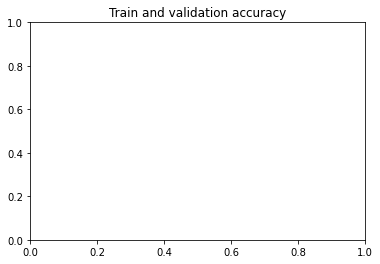

In [30]:
plt.title('Train and validation accuracy')
plt.plot(AlexNet.history.history['val_accuracy'],label='Val_accu')
plt.plot(AlexNet.history.history['accuracy'],label='Train_accu')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Accuracy')
plt.show()


In [ ]:
plt.title('Train and Validation loss')
plt.plot(AlexNet.history.history['val_loss'],label='val_loss')
plt.plot(AlexNet.history.h)

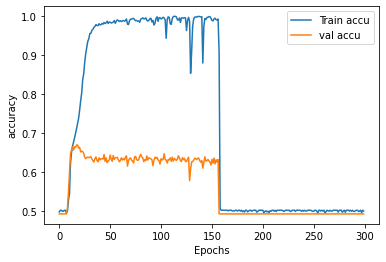

<Figure size 432x288 with 0 Axes>

In [60]:
y_pred = np.where(y_pred>.5,1,0)


In [67]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

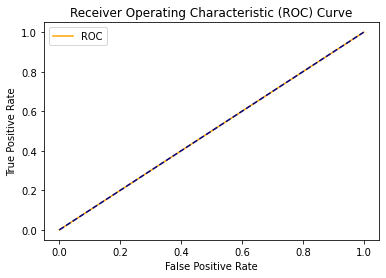

In [68]:
plot_roc_curve(fpr,tpr)

In [85]:
y_pred

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

,1
3381,0
24403,1
14319,1
22676,1
3634,0
...,...
21575,1
5390,0
860,0
15795,1


In [76]:
y_pred = np.where(y_pred>.5,1,0)

In [77]:
y_pred  

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [78]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
thresholds

array([2, 1])

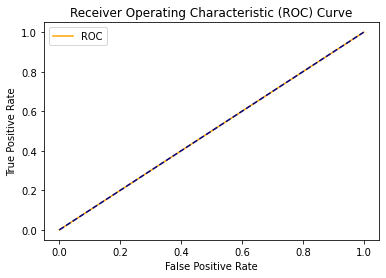

In [81]:
plot_roc_curve(fpr,tpr)

In [83]:

conf_matrix =confusion_matrix(y_test, y_pred)

In [84]:
conf_matrix

array([[   0, 2797],
       [   0, 2715]], dtype=int64)

In [86]:
np.argmax(y_test)

,1
2476,0
7808,0
18967,1
26037,1
14316,1
...,...
18113,1
9358,0
3984,0
4265,0


In [88]:
np.argmax(y_test,axis=1)

,1
2476,0
7808,0
18967,0
26037,0
14316,0
...,...
18113,0
9358,0
3984,0
4265,0


In [92]:
c=AlexNet.predict_classes(X_test)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [94]:
AlexNet.predict(X_test)

array([[0.50205487],
       [0.50205487],
       [0.50205487],
       ...,
       [0.50205487],
       [0.50205487],
       [0.50205487]], dtype=float32)

In [16]:
import tensorflow as tf 

if tf.test.gpu_device_name():
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")


    

Default GPU Device:/device:GPU:0


In [17]:
import tensorflow as tf
tf.test.is_gpu_available()
tf.test.is_built_with_cuda()

True